In [ ]:
import warnings; warnings.filterwarnings("ignore")

The Solar Dynamics Observatory [SDO, @Pesnell2012] / Helioseismic and Magnetic Imager [HMI, @Schou2012] have produced a wealth of data for the Sun, particularly the magnetic field on the solar surface (photosphere). The Space-Weather HMI Active Region Patches [SHARPs, @Bobra2014] are a set of data products derived from the HMI data, which have been used extensively in solar physics and space weather research. The information for the SHARP data is available on [this JSOC page](http://jsoc.stanford.edu/doc/data/hmi/sharp/sharp.htm).

This post focuses on how to download the SHARP CEA data from the JSOC.

## SHARP Data Product on JSOC

All SDO data are available from the Standford [Joint Science Operations Center (JSOC)](http://jsoc.stanford.edu/), which employs the Data Record Management System (DRMS) to manage the data. The data can be accessed through Python using the SunPy's `drms` package.

We can establish a connection to the JSOC by creating a `drms.Client` instance.

In [ ]:
import drms
c = drms.Client()

- For each *dataseries*, there are several *records* identified by one or more *prime keywords*.
- For each *record*, there are several *keywords* that describe the data and *segments* that contains actual data.
- Users can *export* the record as a FITS file whose header contains *keywords* and data array contains *segments*.


| JSOC Dataseries Name | Description         |
|----------------------|---------------------|
| `hmi.sharp_*`        | SHARP data products |

In [ ]:
c.series('hmi.sharp_')

['hmi.sharp_720s',
 'hmi.sharp_720s_dconS',
 'hmi.sharp_720s_nrt',
 'hmi.sharp_cea_720s',
 'hmi.sharp_cea_720s_dconS',
 'hmi.sharp_cea_720s_nrt']

Here, `_nrt` indicates the near-real-time (NRT) data series with preliminary calibration, whereas the absence of `_nrt` indicates the definitive data series.

Also, `_720s` indicates that the data series are obtained with a 720s (12m) cadence.

## SHARP vs SHARP CEA

- The SHARP data series `hmi.sharp_720s` are definitive data with 31 segments in Charge-Coupled Device (CCD) coordinate system. (a direct cutout from the full-disk image)
- The SHARP CEA data seires `hmi.sharp_cea_720s` are definitive data with 11 segments in Cylindrical Equal-Area (CEA) coordinate system centered on the patch.

In [ ]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)  # Remove the limit on column string length

In [ ]:
sharp = c.info('hmi.sharp_720s')

In [ ]:
sharp.segments

,type,units,protocol,dims,note
name,,,,,
magnetogram,int,Gauss,fits,VARxVAR,magnetogram
bitmap,char,Enumerated,fits,VARxVAR,Mask for the patch
Dopplergram,int,m/s,fits,VARxVAR,Dopplergram
continuum,int,DN/s,fits,VARxVAR,continuum intensity
inclination,int,deg,fits,VARxVAR,Inclination
azimuth,int,deg,fits,VARxVAR,Azimuth
field,int,gauss,fits,VARxVAR,Field Strength
vlos_mag,int,cm/s,fits,VARxVAR,LOS Velocity with Field
dop_width,int,mA,fits,VARxVAR,Doppler Width


In [ ]:
sharp_cea = c.info('hmi.sharp_cea_720s')

In [ ]:
sharp_cea.segments

,type,units,protocol,dims,note
name,,,,,
magnetogram,int,Gauss,fits,VARxVAR,Line-of-sight magnetogram in CEA projection
bitmap,char,Enumerated,fits,VARxVAR,Mask for the patch in CEA coordinates
Dopplergram,int,m/s,fits,VARxVAR,Dopplergram in CEA projection
continuum,int,DN/s,fits,VARxVAR,Intensitygram in CEA projection
Bp,int,Gauss,fits,VARxVAR,"B_phi, positive westward"
Bt,int,Gauss,fits,VARxVAR,"B_theta, positive southward"
Br,int,Gauss,fits,VARxVAR,"B_r, positive up"
Bp_err,int,Gauss,fits,VARxVAR,Standard deviation of B_phi
Bt_err,int,Gauss,fits,VARxVAR,Standard deviation of B_theta


## NOAA AR to HARP Matching

A record of the SHARP data series is identified by two *prime keywords*: `HARPNUM` (HARP number) and `T_REC` (observation time). Since HARP is identified independently from the National Oceanic and Atmospheric Administration (NOAA), the HARP number is different from NOAA active region (AR) number. Even one HARP can correspond to zero, one, or more NOAA ARs. There is a file for mapping between HARP numbers and NOAA AR numbers [here](http://jsoc.stanford.edu/doc/data/hmi/harpnum_to_noaa/all_harps_with_noaa_ars.txt).

Also, the SHARP keywords include those for NOAA AR numbers, which start with `NOAA_`.

In [ ]:
sharp.keywords[sharp.keywords.index.str.startswith('NOAA_')]

,type,recscope,defval,units,note,linkinfo,is_time,is_integer,is_real,is_numeric
name,,,,,,,,,,
NOAA_AR,int,variable,-2147483648,none,NOAA AR number that best matches this HARP,None,False,True,False,True
NOAA_NUM,int,variable,-2147483648,none,Number of NOAA ARs that match this HARP (0 allowed),None,False,True,False,True
NOAA_ARS,string,variable,,none,Comma-separated list of NOAA ARs matching this HARP,None,False,False,False,False


As an example, let's find the HARP number corresponding to the NOAA AR number 12673 which produced the largest solar flare in solar cycle 24.

To do this, we need to query keywords `HARPNUM` and `NOAA_AR` using the `drms.Client.query` method. The `key` argument specifies which keywords to query. We need to use two primary keys: the HARP number (blank in this case) and the time range (2017-09-04T00:00:00 in this case).

In [ ]:
results = c.query('hmi.sharp_720s[][2017-09-04T00:00:00]', key=['HARPNUM', 'NOAA_AR', 'NOAA_ARS', 'NOAA_NUM'])

In [ ]:
results

,HARPNUM,NOAA_AR,NOAA_ARS,NOAA_NUM
0,7115,12673,12673,1
1,7117,12674,"12674,12679",2
2,7118,0,MISSING,0
3,7120,12675,12675,1
4,7121,0,MISSING,0
5,7122,12677,12677,1
6,7123,12675,"12675,12676",2


As you can see, the HARP number for the NOAA AR 12673 is 7115.

There are summary images for HARP data [here](http://jsoc.stanford.edu/doc/data/hmi/harp/harp_definitive/). The following image is the summary image for the HARPs on 2017-09-04T00:00:00.

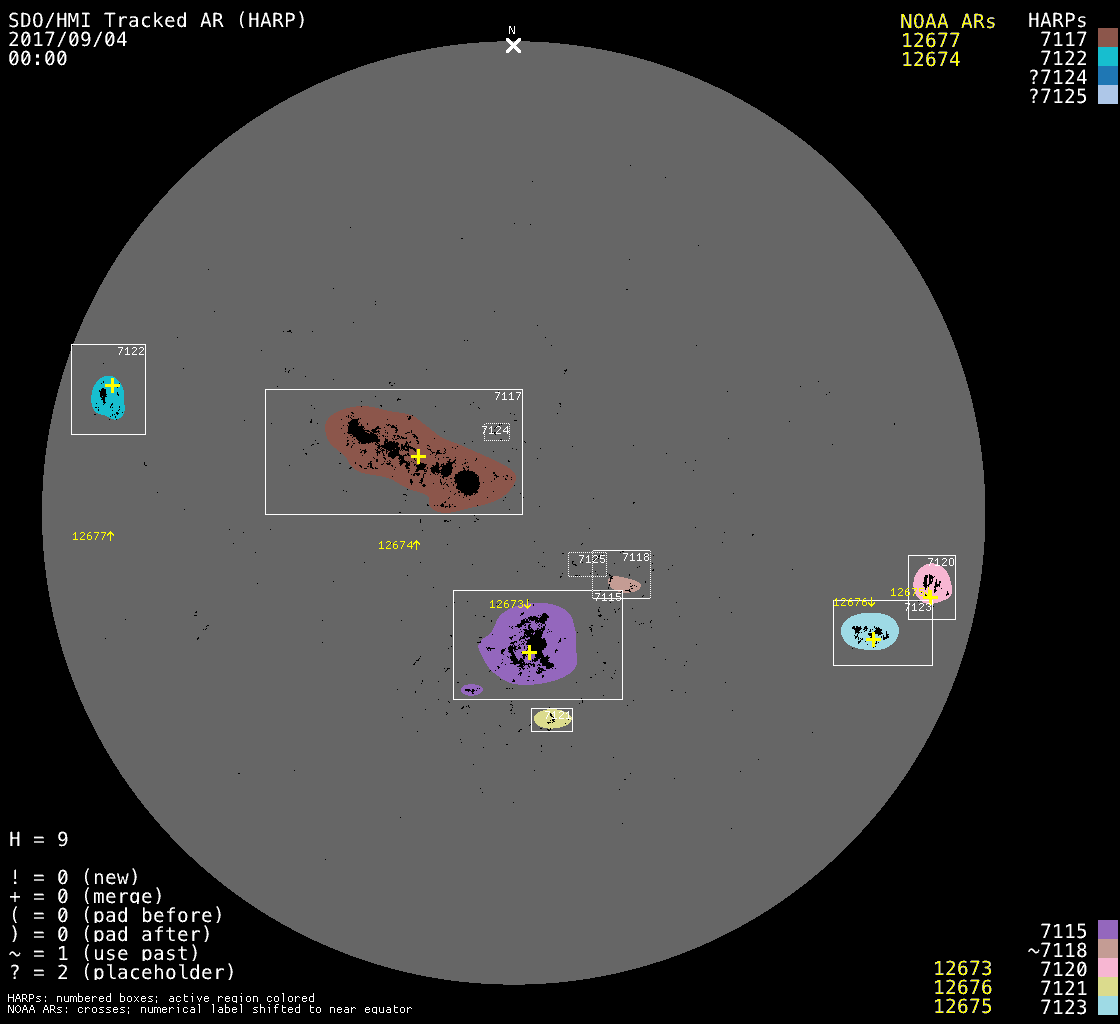

In [ ]:
from IPython.display import Image

Image('http://jsoc.stanford.edu/doc/data/hmi/harp/harp_definitive/2017/09/04/harp.2017.09.04_00:00:00_TAI.png')

At this time, the AR 12673 (HARP 7115) is located near the center of the solar disk, with a slight southward shift.

## SHARP CEA Data

Let's now download the SHARP CEA data for the HARP 7115 (NOAA AR 12673) on 2017-09-04T00:00:00. 

There are basically two ways to download data from the JSOC:

1. Download merged FITS files (*export*), which requires an email address registered [here](http://jsoc.stanford.edu/ajax/exportdata.html).
2. Download *segments* (data) and *keywords* (metadata) separately and merge them as FITS files if needed.

In [ ]:
# Construct query
query = 'hmi.sharp_cea_720s[7115][2017-09-04T00:00:00]'

### 1. Download merged FITS files

In [ ]:
from pathlib import Path
sharp_cea_path = Path('./data/export/sharp_cea')
sharp_cea_path.mkdir(parents=True, exist_ok=True)

In [ ]:
email = ''  # A registered email address
c = drms.Client(email=email)
r = c.export(query, protocol='fits')
r.wait()
if r.status == 0:
    r.download(sharp_cea_path)

Since this is the SHARP CEA data, there are 11 files (segments) in total.

In [ ]:
sharp_cea_list = sorted(sharp_cea_path.glob('*.fits'))
print(len(sharp_cea_list))
for file in sharp_cea_list:
    print(file.name)

11
hmi.sharp_cea_720s.7115.20170904_000000_TAI.bitmap.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Bp.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Bp_err.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Br.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Br_err.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Bt.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Bt_err.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.conf_disambig.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.continuum.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.Dopplergram.fits
hmi.sharp_cea_720s.7115.20170904_000000_TAI.magnetogram.fits


Using `sunpy.map.Map`, we can easily read the SHARP CEA data and visualize it. Let's see the Br component of the magnetic field.

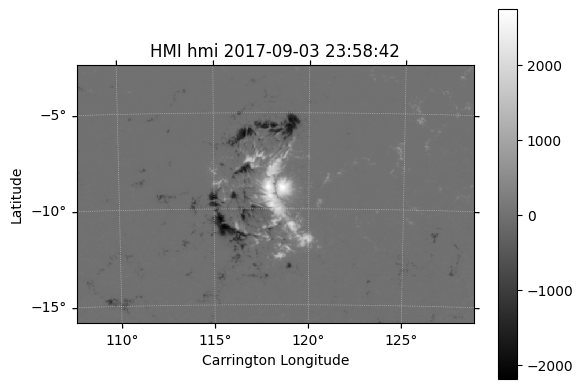

In [ ]:
from sunpy.map import Map

sharp_cea_br = Map(sharp_cea_path / 'hmi.sharp_cea_720s.7115.20170904_000000_TAI.Br.fits')
sharp_cea_br.peek()

The below shows the FITS header of this file.

In [ ]:
sharp_cea_br.fits_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                  688 / length of original image axis                  
NAXIS2  =                  448 / length of original image axis                  
BLANK   =          -2147483648                                                  
BZERO   =                  0.0                                                  
BSCALE  =                 0.01                                                  
CHECKSUM= 'ZoJAflG8ZlGAflG5'   / HDU checksum updated 2025-08-01T11:36:33       
DATASUM = '2018488944'         / data unit checksum updated 2017-10-09T03:05:15 
DATE    = '2017-10-09T03:04:53.000' / [ISO] HDU creation date                   
DATE_S  = '2017-09-08T17:19:08.000' / [ISO] Date_time of generating Stokes data 
DATE_B  = '2017-09-10T08:49:

### 2. Download segments and keywords separately

In [ ]:
c = drms.Client()  # No email address needed

All keywords associated with the query can be obtained using `drms.JsocInfoConstants.all`.

In [ ]:
keywords = c.query(query, key=drms.JsocInfoConstants.all)
keywords

,DATE,DATE_S,DATE_B,DATE__OBS,DATE-OBS,T_OBS,T_REC,T_REC_epoch,T_REC_step,T_REC_unit,...,CMASK,ERRJZ,ERRVF,ERRALP,ERRMIH,ERRMSHA,ERRUSI,DOFFSET,ERRTPOT,ERRJHT
0,2017-10-09T03:04:53Z,2017-09-08T17:19:08Z,2017-09-10T08:49:19Z,2017-09-03T23:58:42.20Z,2017-09-03T23:58:42.20Z,2017.09.04_00:00:04_TAI,2017.09.04_00:00:00_TAI,1993.01.01_00:00:00_TAI,720.0,secs,...,36433.0,0.050562,7.043552e+18,0.001091,0.000576,0.0,2.446410e+11,50,5.279564e+20,9.853718e+11


We can get a list of names of segments using `drms.Client.info` and then query the keywords and segments using `drms.Client.query`.

In [ ]:
sharp_cea = c.info('hmi.sharp_cea_720s')
sharp_cea_segments = sorted(sharp_cea.segments.index)
print(sharp_cea_segments)

['Bp', 'Bp_err', 'Br', 'Br_err', 'Bt', 'Bt_err', 'Dopplergram', 'bitmap', 'conf_disambig', 'continuum', 'magnetogram']


In [ ]:
keywords, segments = c.query(query, key=drms.JsocInfoConstants.all, seg=sharp_cea_segments)

In [ ]:
keywords

,DATE,DATE_S,DATE_B,DATE__OBS,DATE-OBS,T_OBS,T_REC,T_REC_epoch,T_REC_step,T_REC_unit,...,CMASK,ERRJZ,ERRVF,ERRALP,ERRMIH,ERRMSHA,ERRUSI,DOFFSET,ERRTPOT,ERRJHT
0,2017-10-09T03:04:53Z,2017-09-08T17:19:08Z,2017-09-10T08:49:19Z,2017-09-03T23:58:42.20Z,2017-09-03T23:58:42.20Z,2017.09.04_00:00:04_TAI,2017.09.04_00:00:00_TAI,1993.01.01_00:00:00_TAI,720.0,secs,...,36433.0,0.050562,7.043552e+18,0.001091,0.000576,0.0,2.446410e+11,50,5.279564e+20,9.853718e+11


In [ ]:
segments

,Bp,Bp_err,Br,Br_err,Bt,Bt_err,Dopplergram,bitmap,conf_disambig,continuum,magnetogram
0,/SUM98/D978177825/S00000/Bp.fits,/SUM98/D978177825/S00000/Bp_err.fits,/SUM98/D978177825/S00000/Br.fits,/SUM98/D978177825/S00000/Br_err.fits,/SUM98/D978177825/S00000/Bt.fits,/SUM98/D978177825/S00000/Bt_err.fits,/SUM98/D978177825/S00000/Dopplergram.fits,/SUM98/D978177825/S00000/bitmap.fits,/SUM98/D978177825/S00000/conf_disambig.fits,/SUM98/D978177825/S00000/continuum.fits,/SUM98/D978177825/S00000/magnetogram.fits


Using the url information for each segment, we can download each file.

In [ ]:
t_rec = keywords['T_REC'].item()
t_rec

'2017.09.04_00:00:00_TAI'

In [ ]:
segment = segments['Br'].item()
print(segment)

/SUM98/D978177825/S00000/Br.fits


In [ ]:
url = 'http://jsoc.stanford.edu' + segment
url

'http://jsoc.stanford.edu/SUM98/D978177825/S00000/Br.fits'

In [ ]:
from urllib.request import urlretrieve
urlretrieve(url, 'Br.fits');

In [ ]:
from astropy.io import fits
hdul = fits.open('Br.fits')
hdul.info()


Filename: Br.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU     10   (688, 448)   int32   


In [ ]:
hdul[1].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                  688 / length of original image axis                  
NAXIS2  =                  448 / length of original image axis                  
BLANK   =          -2147483648                                                  
BZERO   =                   0.                                                  
BSCALE  =                 0.01                                                  
CHECKSUM= 'lBDPo99OlACOl99O'   / HDU checksum updated 2017-10-09T03:05:15       
DATASUM = '2018488944'         / data unit checksum updated 2017-10-09T03:05:15 

As you can see, the header contains only basic information. However, the data is exactly the same as the one downloaded using the `drms.Client.export` method.

In [ ]:
import numpy as np
np.allclose(hdul[1].data, sharp_cea_br.data)

True

In [ ]:
hdul.close()

We can construct a header from the keywords. Note that there is no `DATE-OBS` in the keywords, instead `DATE__OBS` exists. The following note comes from the "4.2.4 JSOC Image Timing Details" section of the [Guide to SDO Data Analysis](https://www.lmsal.com/sdodocs/doc/dcur/SDOD0060.zip/zip/entry/).

> TECHNICAL NOTE: The JSOC keyword naming convention does not allow for hyphens, and consequently the DATE-OBS keyword is represented as DATE__OBS (with two underscores) within the JSOC. However, upon export to FITS files, this keyword gets converted to DATE-OBS so as to be compliant with the FITS standard. Additionally, note that the keyword DATE_OBS (with one underscore) that was more common during the SOHO era is not used by the JSOC.

I refer to [this code](https://github.com/RobertJaro/InstrumentToInstrument/blob/master/itipy/download/download_sdo.py) for the following code.

In [ ]:
from sunpy.util import MetaDict
from sunpy.io._fits import header_to_fits

header = keywords.iloc[0].to_dict()
header['DATE_OBS'] = header['DATE__OBS']
header = header_to_fits(MetaDict(header))

with fits.open('Br.fits', 'update') as f:
    hdr = f[1].header
    for k, v in header.items():
        if pd.isna(v):
            continue
        hdr[k] = v
    f.verify('silentfix')

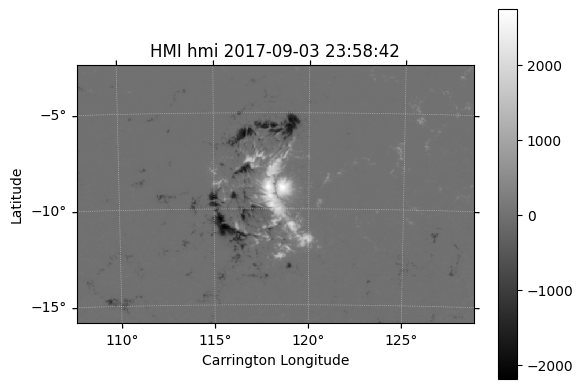

In [ ]:
sharp_cea_br_sep = Map('Br.fits')
sharp_cea_br_sep.peek()

In [ ]:
sharp_cea_br_sep.fits_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                  688 / length of original image axis                  
NAXIS2  =                  448 / length of original image axis                  
BLANK   =          -2147483648                                                  
BZERO   =                  0.0                                                  
BSCALE  =                 0.01                                                  
CHECKSUM= 'U0UHV0S9U0SEU0S9'   / HDU checksum updated 2025-08-01T22:17:03       
DATASUM = '2018488944'         / data unit checksum updated 2025-08-01T22:17:03 
DATE    = '2017-10-09T03:04:53Z'                                                
DATE_S  = '2017-09-08T17:19:08Z'                                                
DATE_B  = '2017-09-10T08:49:

The header is not exactly the same as the one downloaded using the `drms.Client.export` method, but it is basically the same as you can see.